<a href="https://colab.research.google.com/github/yugetcodes/git-demo/blob/main/Logistic_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Description

In [ ]:
'''
Logistic Regression
it is probality based modal
in regression model it expect linear relation between x and y
we expect the realtion between y and x : ? log of odds
odds ratio(success) = prob(success)/prob(failure)
odds ratio(failure) = prob(failure)/prob(success)
for binary classification: odds ratio = odds ratio(success)/odds ratio(failure)
logit function(ranges from 0 to 1) = log(p/1-p) = log(success)
desicion boundary : the clssifier of groups
easiest case of seperation : linearly seperable(using straight line we can seperate the classes)
non linearly seperated
threshold: prob > .5 == 1
           prob < .5 == 0
cost function(avg of all loses or errors) for Linear Regression is "mse"
cost function for LOgistic regression ??
cost(h0(x),y) = -log(h0(x)) if y=1
cost(h0(x),y) = -log(1-h0(x)) if y=0
entropy formulae = -p(x)logp(x)
cross entropy = -p(x)logq(x)
p(x)-->actual
q(x)-->predicted
for evaluation we use cost function

'''

'\nLogistic Regression\nit is probality based modal\nin regression model it expect linear relation between x and y\nwe expect the realtion between y and x : ? log of odds\nodds ratio(success) = prob(success)/prob(failure)\nodds ratio(failure) = prob(failure)/prob(success)\nfor binary classification: odds ratio = odds ratio(success)/odds ratio(failure)\nlogit function(ranges from 0 to 1) = log(p/1-p) = log(success)\ndesicion boundary : the clssifier of groups\neasiest case of seperation : linearly seperable(using straight line we can seperate the classes)\nnon linearly seperated\nthreshold: prob > .5 == 1\n           prob < .5 == 0\ncost function(avg of all loses or errors) for Linear Regression is "mse"\ncost function for LOgistic regression ??\ncost(h0(x),y) = -log(h0(x)) if y=1\ncost(h0(x),y) = -log(1-h0(x)) if y=0\nentropy formulae = -p(x)logp(x)\ncross entropy = -p(x)logq(x)\np(x)-->actual\nq(x)-->predicted\nfor evaluation we use cost function\n\n'

# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [ ]:
df = pd.read_csv("/content/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis

In [ ]:
df.size()

In [ ]:
df.shape()

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df = df.drop(['Cabin'],axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [ ]:
df.duplicated().sum()

0

# Data Preprocessing

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
mode = df["Embarked"].mode()[0]
mode

'S'

AttributeError: Rectangle.set() got an unexpected keyword argument 'kde'

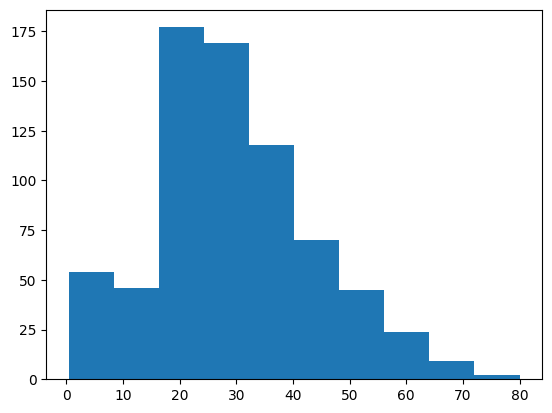

In [ ]:
'''
we have 177  null values have to decide to replace then with mean or median
based on distribution
'''
plt.hist(df['Age'],kde=True)
plt.show()

In [ ]:
'''
since the distribution right skewed mean > median
'''
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

Numerical type columns:
Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'], dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 30:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 30:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Sex', 'Embarked']
Non-Categorical Features: ['Name', 'Ticket']
Discrete Features: ['Survived', 'Pclass', 'SibSp', 'Parch']
Continuous Features: ['PassengerId', 'Age', 'Fare']


In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64



# Data Visualization

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Sex
['male' 'female']

Embarked
['S' 'C' 'Q']

Sex
['male' 'female']

Embarked
['S' 'C' 'Q']



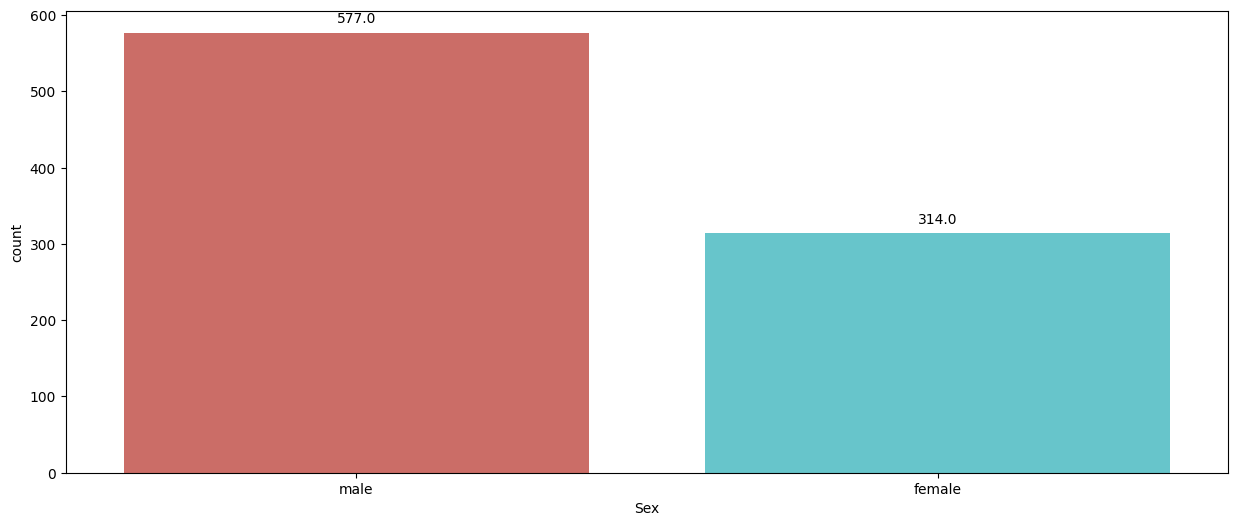

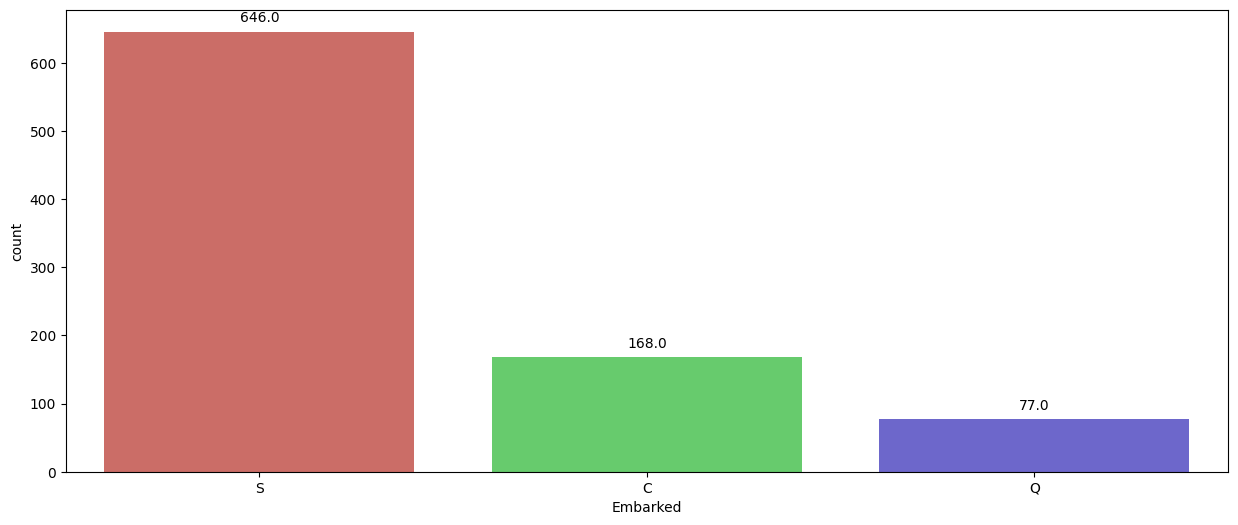

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

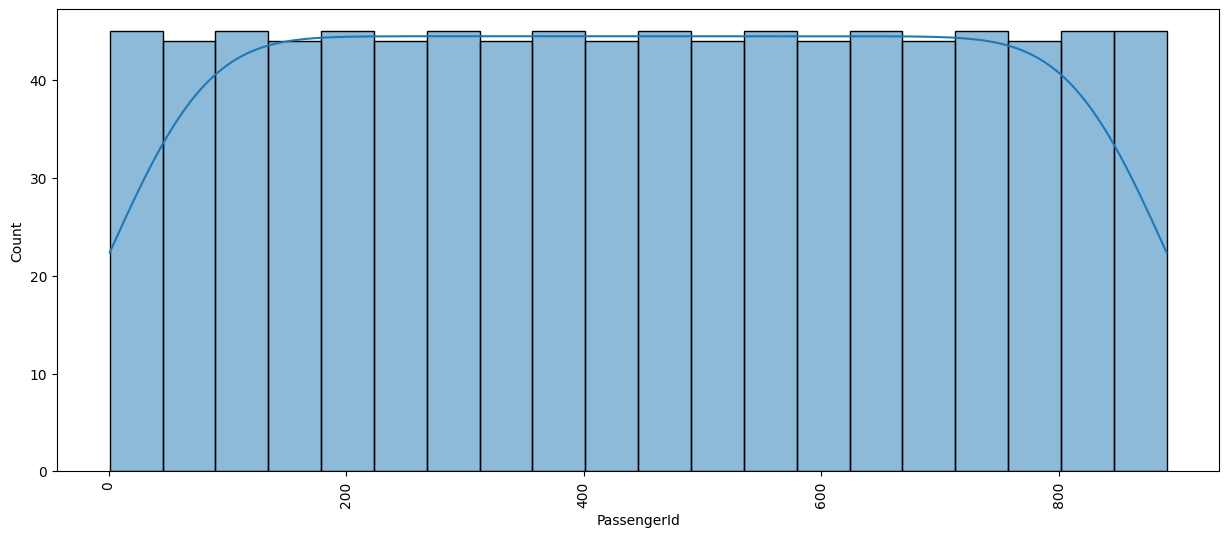

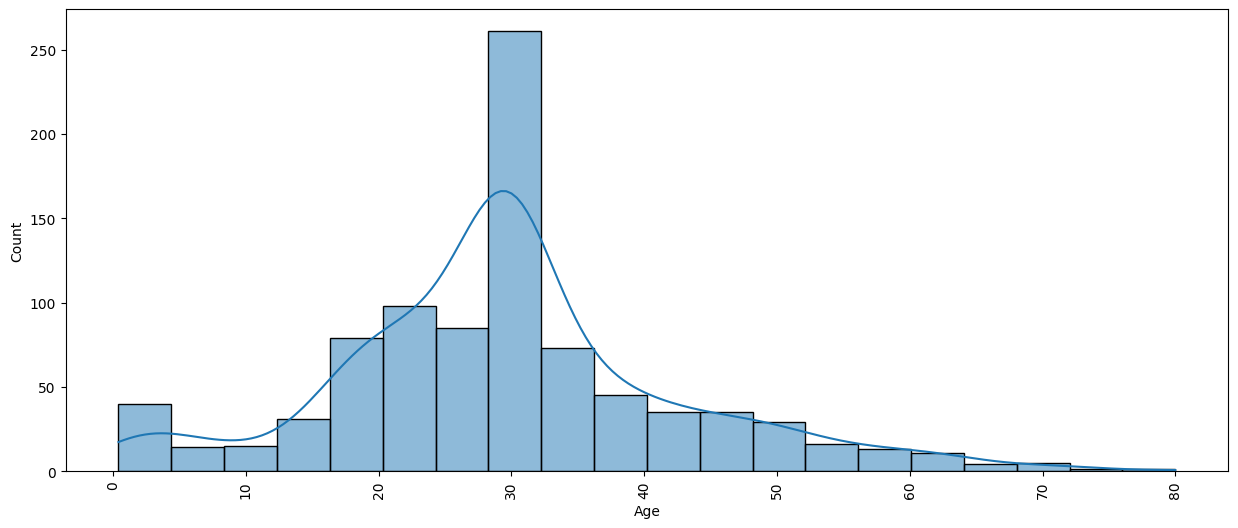

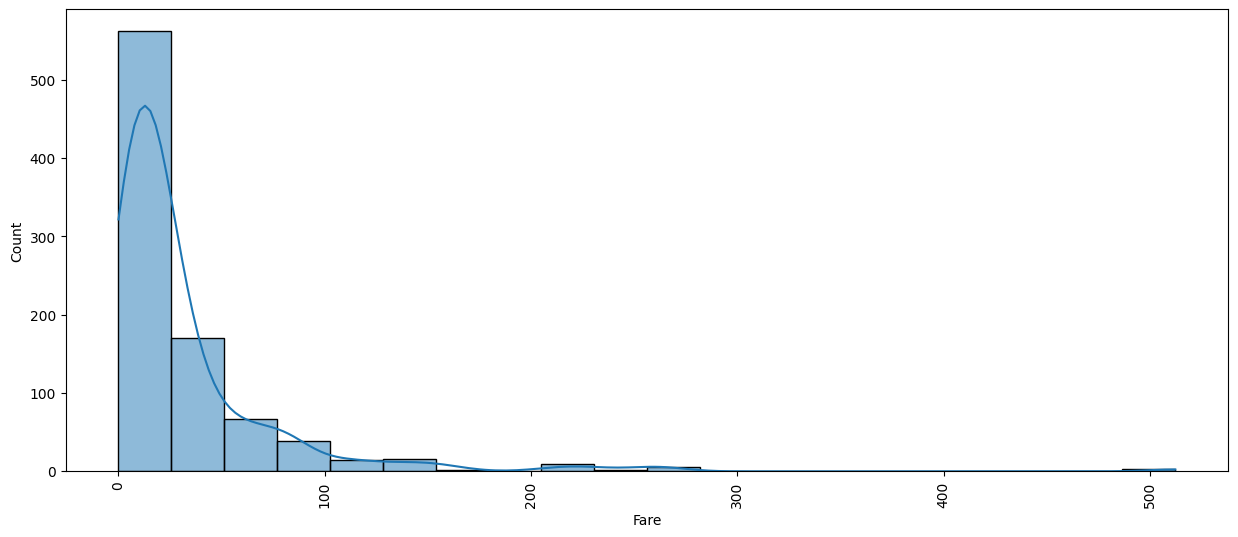

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

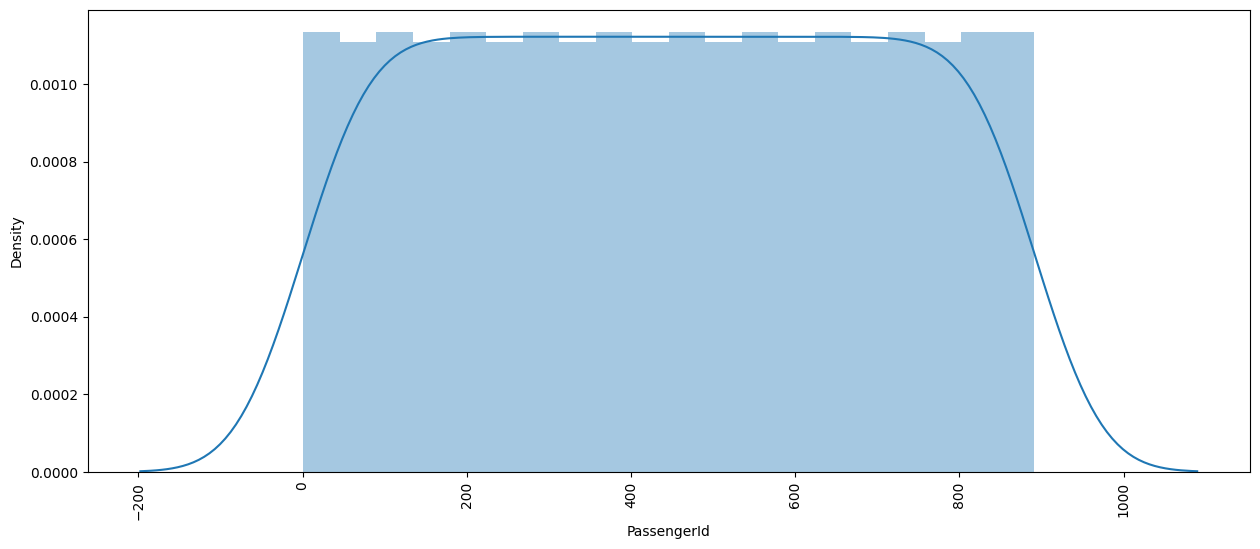

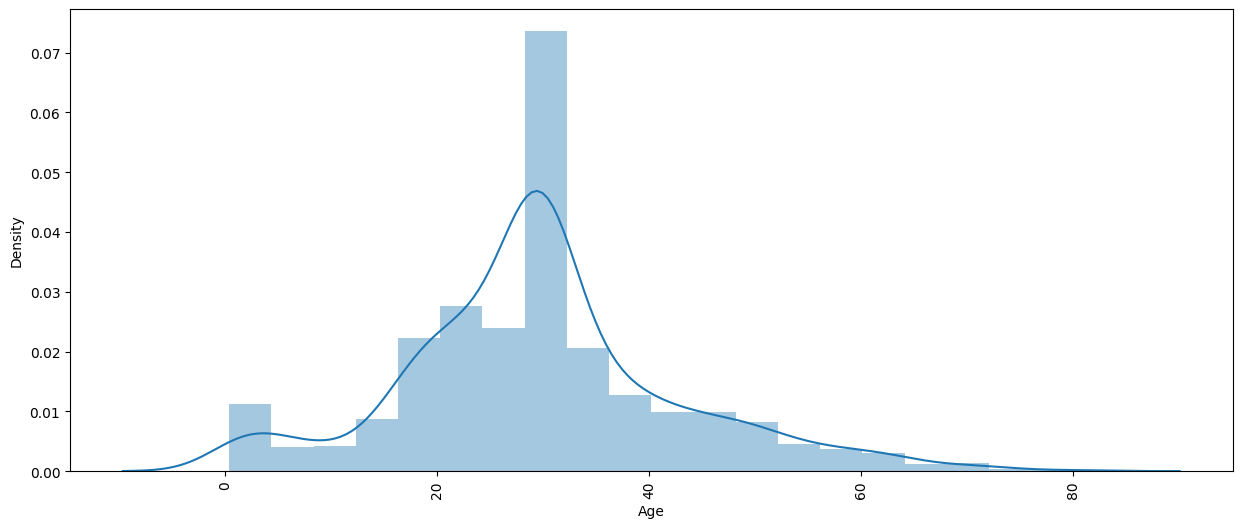

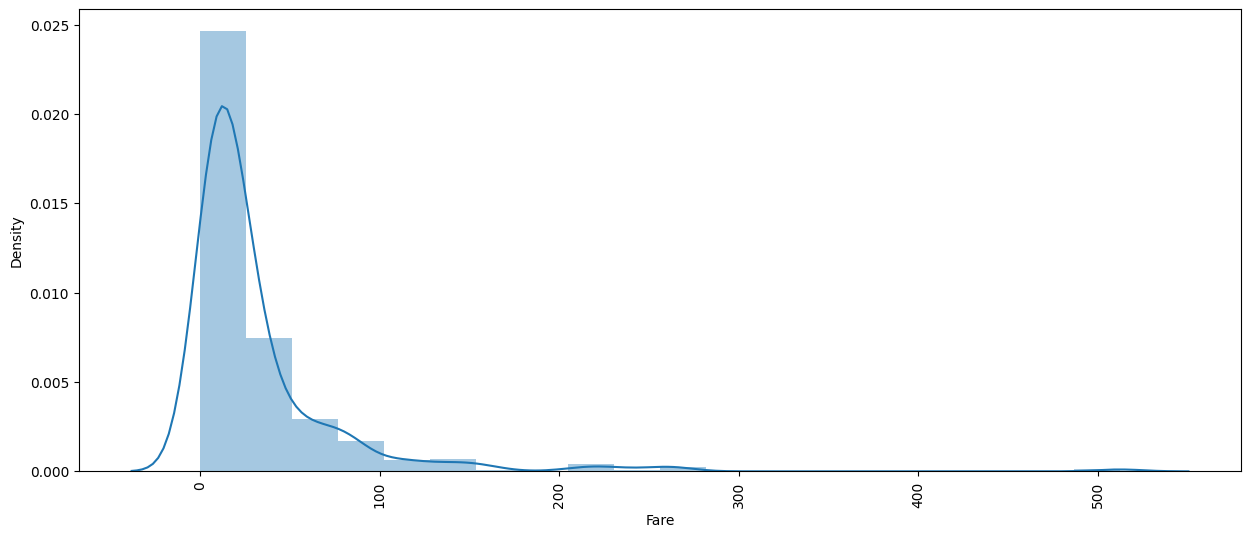

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

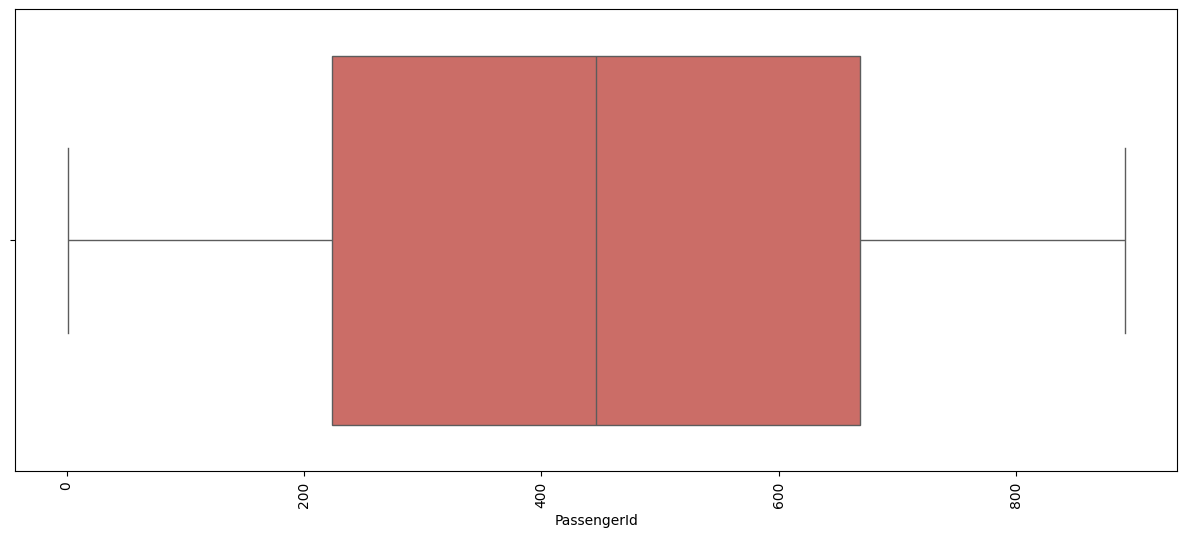

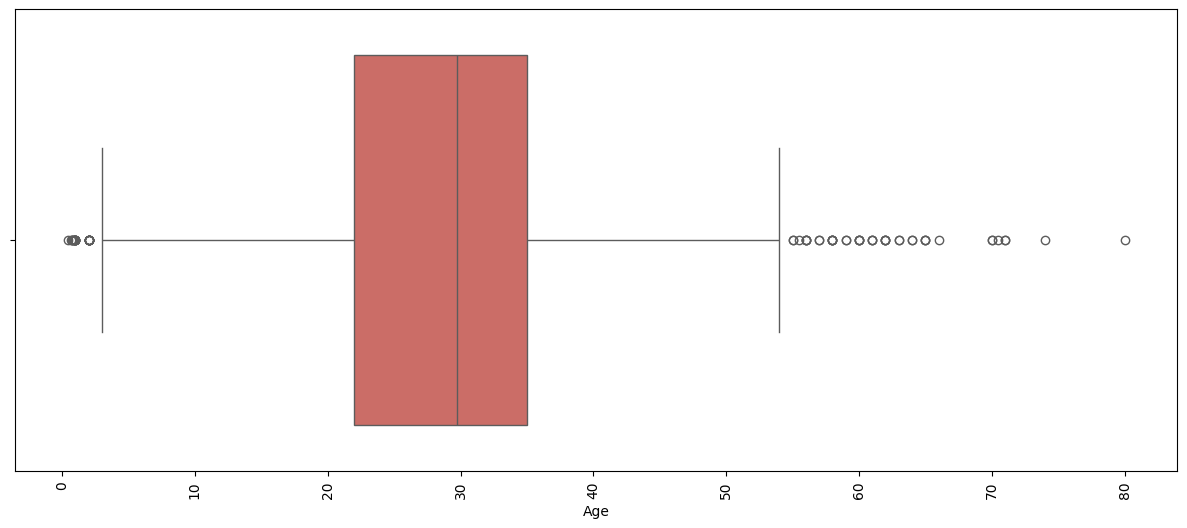

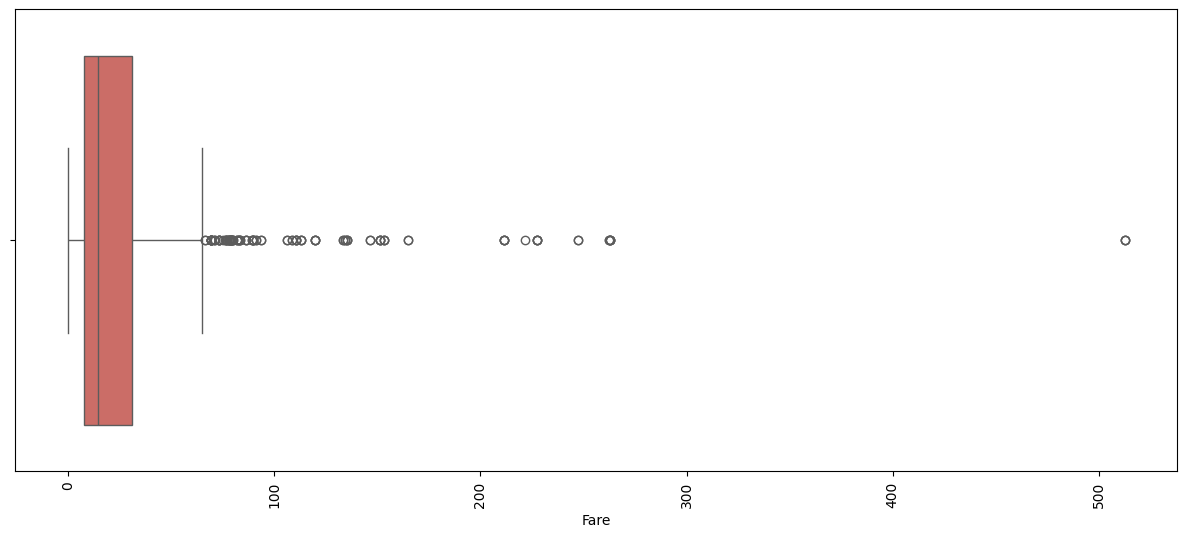

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

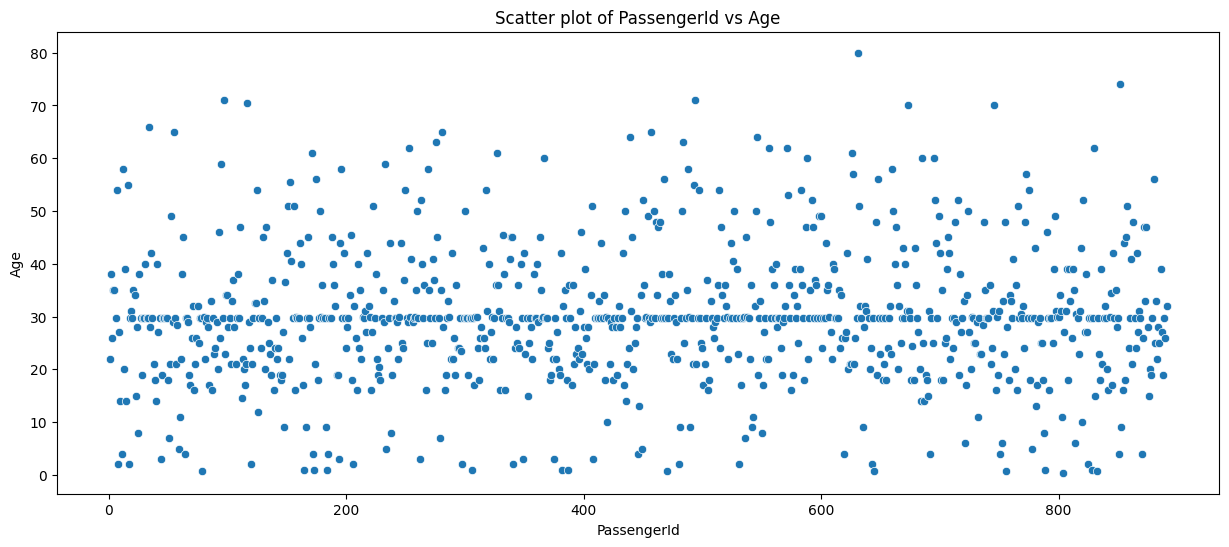

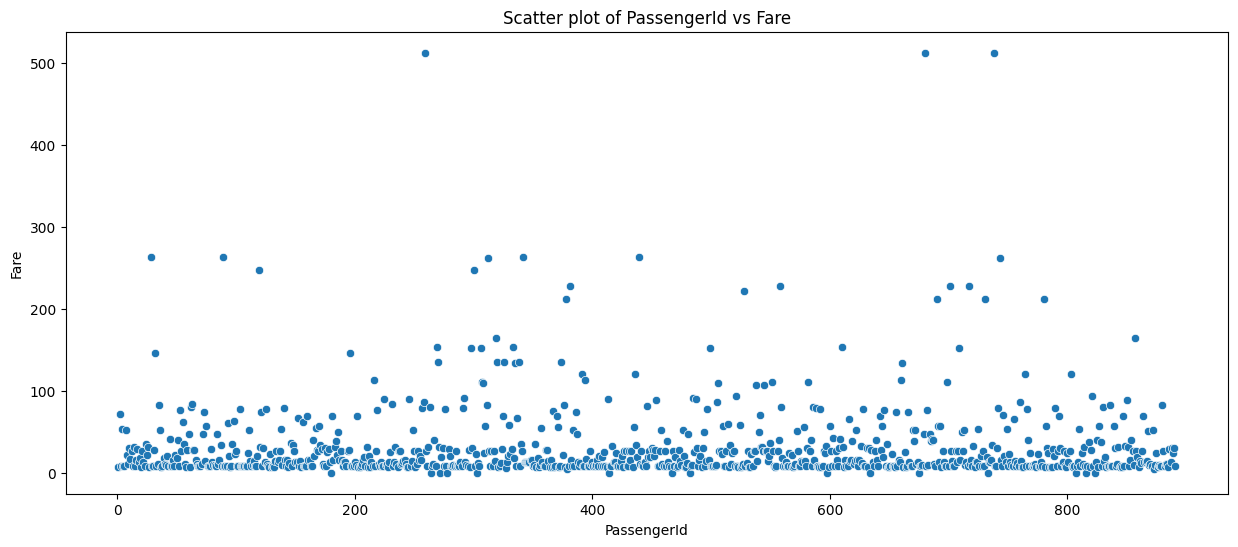

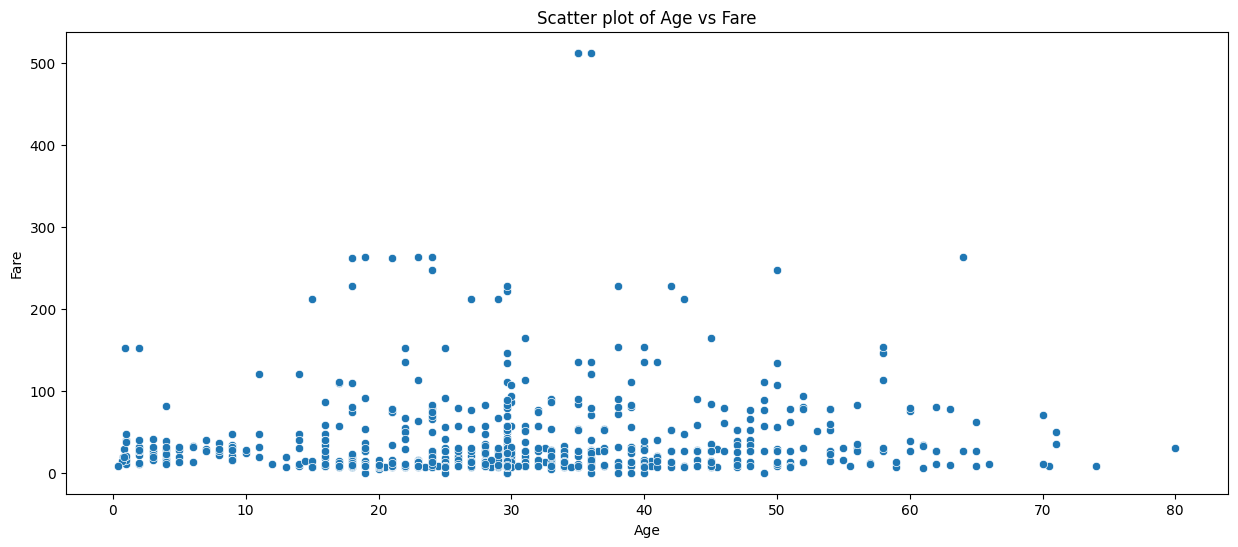

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

In [ ]:
for i in continuous:
  for j in continuous:
    if i != j:
      plt.figure(figsize=(15,6))
      sns.scatterplot(x=i,y=j,data=df,palette='hls')
      plt.title(f'Scatter plot')
      plt.show()

In [ ]:
for i in continuous:
  for j in continuous:
    if i != j:
      plt.figure(figsize=(15,6))
      sns.lineplot(x=i,y=j,data=df,palette='hls')
      plt.title(f'Scatter plot')
      plt.show()

In [ ]:
for cat1 in categorical:
    for cat2 in categorical:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue='Survived')
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

In [ ]:
#we consider plot with survied parameter since it is target
for cat1 in discrete:
    for cat2 in discrete:
        if cat1 != cat2:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df, x=cat1, hue=cat2)
            plt.title(f'{cat1} vs {cat2}')
            plt.xticks(rotation = -45)
            plt.show()

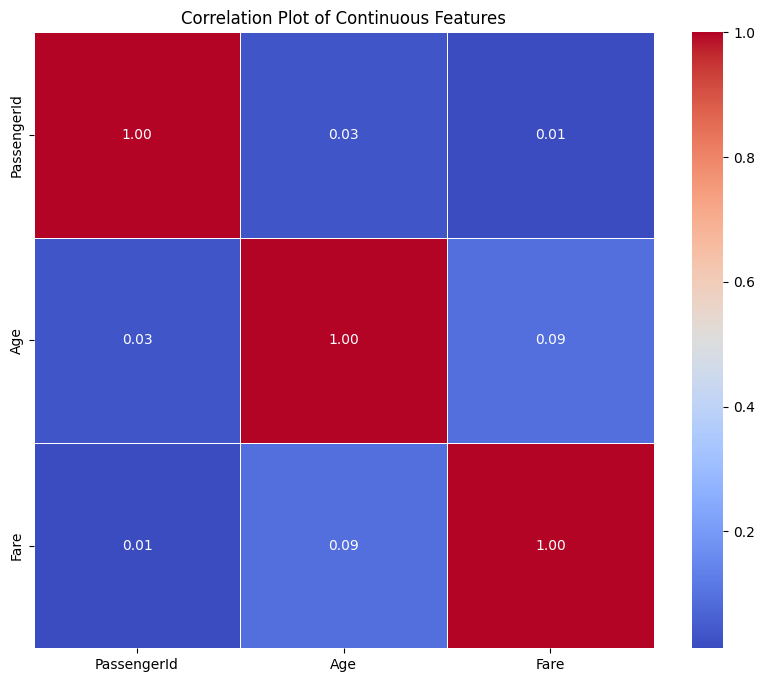

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
avg_survival = df.groupby('Sex')[['Age','Fare']].max().sort_values(ascending=False,by='Age')
avg_survival

,Age,Fare
Sex,,
male,80.0,512.3292
female,63.0,512.3292


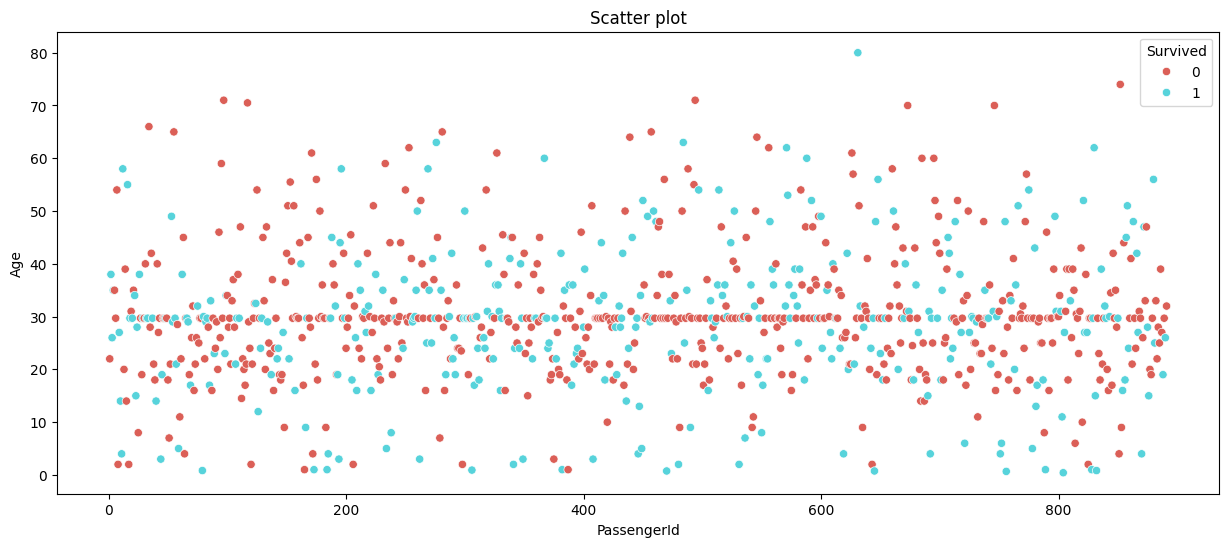

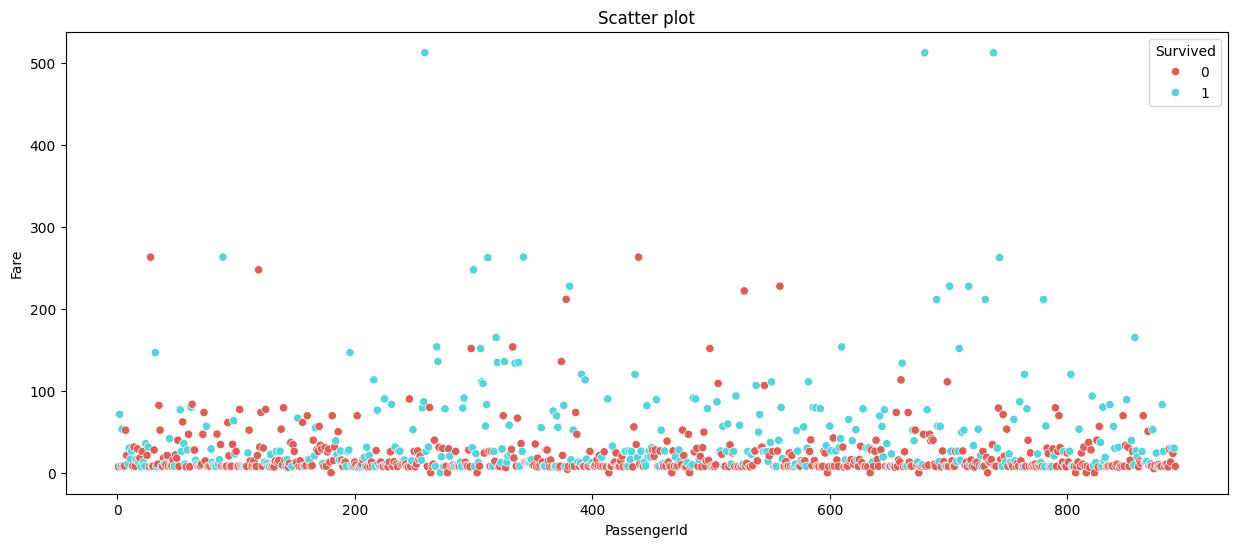

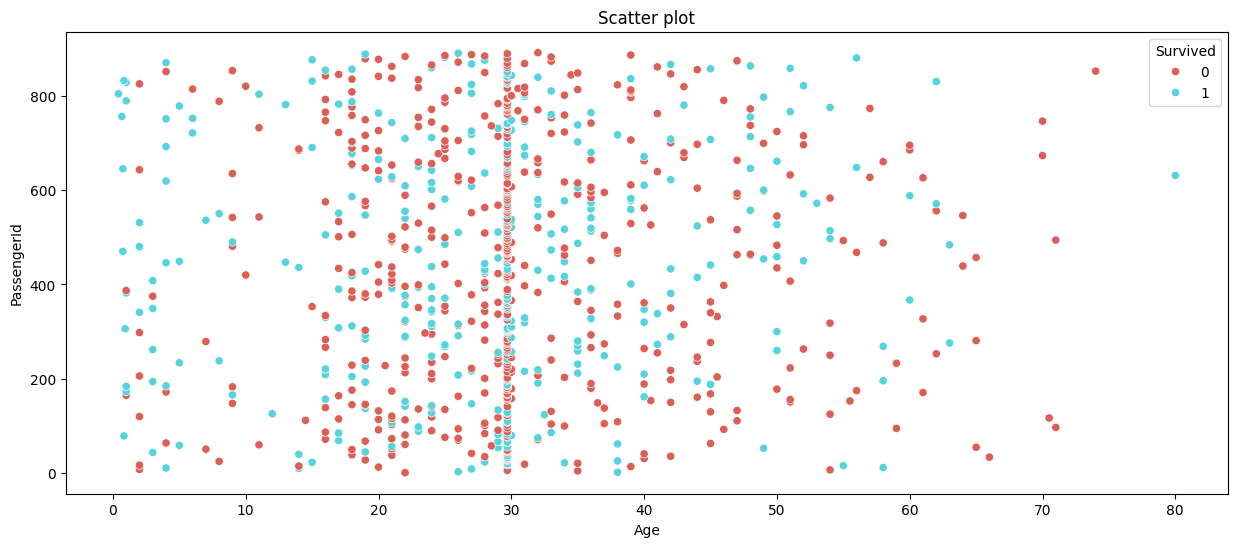

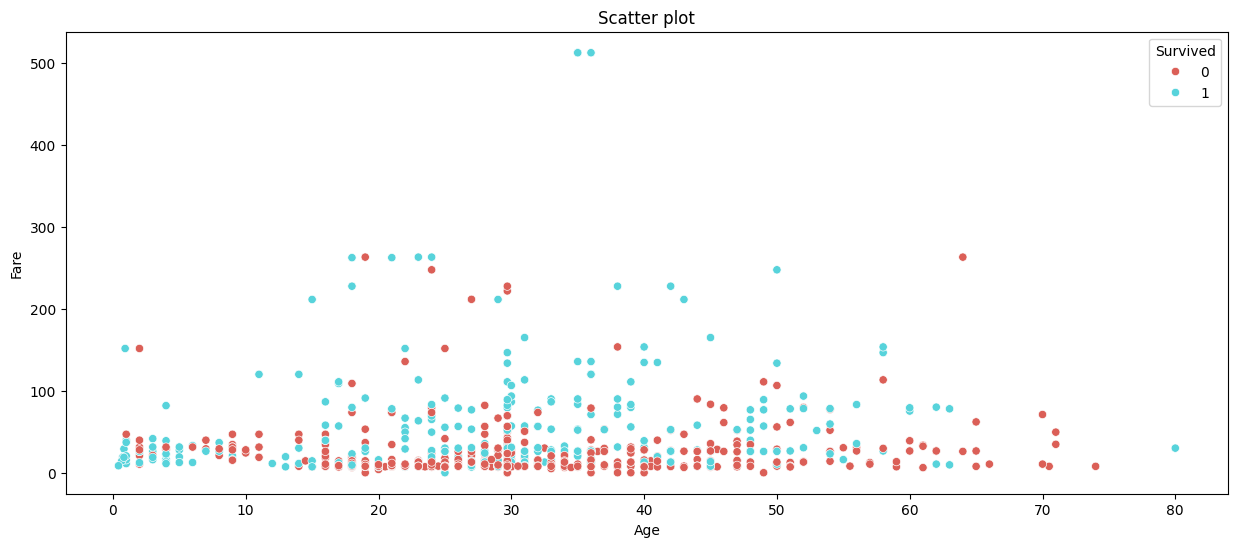

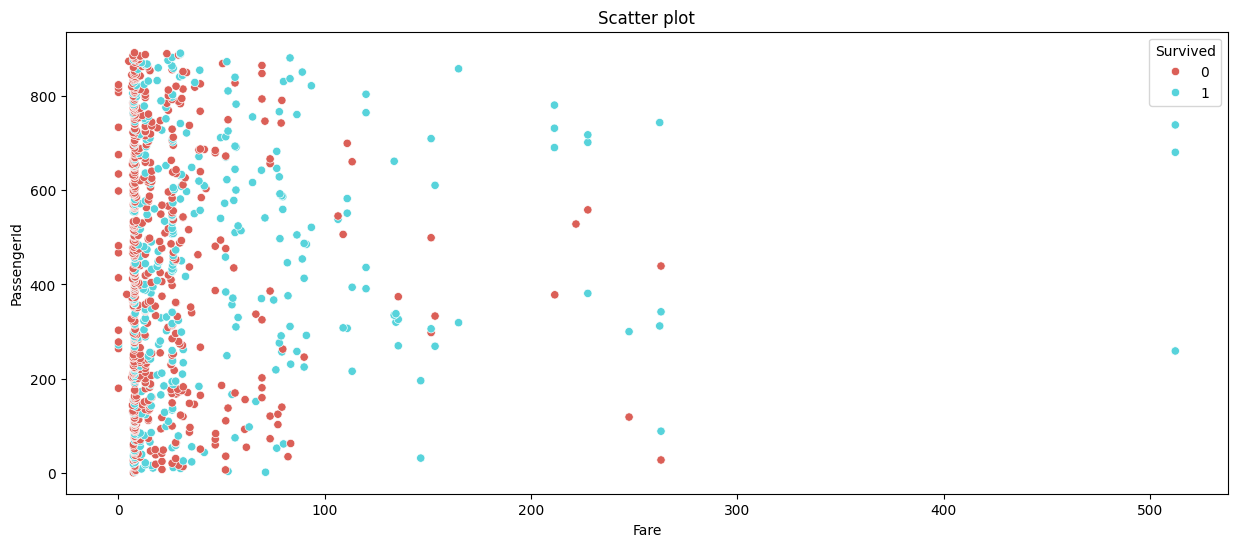

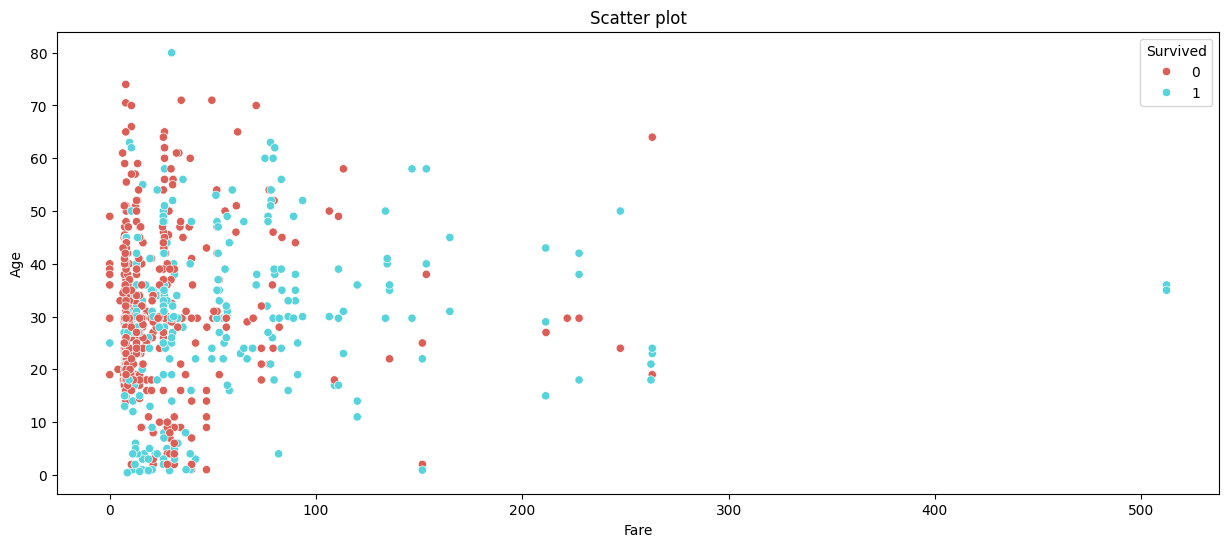

In [ ]:
for i in continuous:
  for j in continuous:
    if i != j:
      plt.figure(figsize=(15,6))
      sns.scatterplot(x=i,y=j,hue='Survived',data=df,palette='hls')
      plt.title(f'Scatter plot')
      plt.show()

# Dummies creation

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,False,True,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,True,False,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,True,False,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,False,True,True,False,False


In [ ]:
df = df.drop(['Name','Ticket'],axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,2,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,3,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,4,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,5,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,888,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,889,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,890,1,1,26.000000,0,0,30.0000,False,True,True,False,False


In [ ]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [ ]:
x

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,True,False,False,False,True
4,5,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,False,True,False,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,True,False,False,False,True
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,True,False,False,False,True
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,False,True,True,False,False


# Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y,
                                                    random_state=42)
'''
stratify=y --> consider same no of 1's and 0's so the modal
is not biased
random_state = 42 tells that 42 entries same so modal will always give same accuracy
'''

"\nstratify=y --> consider same no of 1's and 0's so the modal\nis not biased\nrandom_state = 42 tells that 42 entries same so modal will always give same accuracy\n"

In [ ]:
from sklearn.linear_model import LogisticRegression
#smote
'''
 oversampling: synthetic minority oversampling technique --> increase no of minority samples == majority samples
               duplicates of minority samples
 undersampling
'''

' \n oversampling: synthetic minority oversampling technique --> increase no of minority samples == majority samples\n               duplicates of minority samples\n undersampling\n'

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()

In [ ]:
x_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [ ]:
y_train

692    1
481    0
527    0
855    1
801    1
      ..
359    1
258    1
736    0
462    0
507    1
Name: Survived, Length: 712, dtype: int64

In [ ]:
y_train.value_counts()

Survived
0    439
1    273
Name: count, dtype: int64

In [ ]:
y_train_res


0      1
1      0
2      0
3      1
4      1
      ..
873    1
874    1
875    1
876    1
877    1
Name: Survived, Length: 878, dtype: int64

In [ ]:
y_train_res.value_counts()

Survived
1    439
0    439
Name: count, dtype: int64

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train_res,y_train_res)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
logreg.score(x_train_res,y_train_res)

0.8177676537585421

In [ ]:
'''
Evalution criteria:
confusion matrix
precision TP /(TP+FP)
recall TP / (TP+FN)
f1 score = harmonic mean of precision and recall
support = no of actual instances of each class no of 0's and no of 1's
'''

# Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

# calculate precision
precision = precision_score(y_test, y_pred)

print(precision)

# calculate recall
recall = recall_score(y_test, y_pred)

print(recall)

# calculate F1 score
f1 = f1_score(y_test, y_pred)

print(f1)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

0.8100558659217877
0.7611940298507462
0.7391304347826086
0.75
[[94 16]
 [18 51]]


In [ ]:

cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
pip install scikit-plot


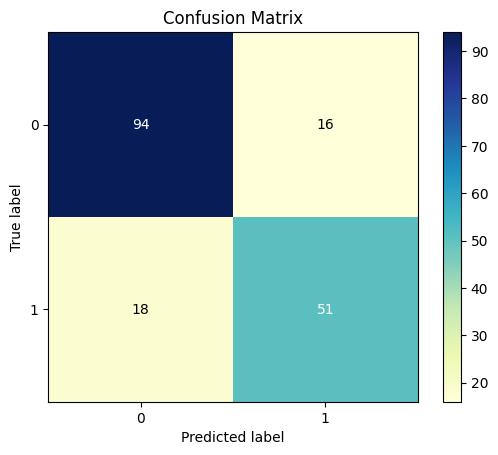

In [ ]:
#ploting confusion matrix
from scikitplot.metrics import plot_confusion_matrix, plot_roc
plot_confusion_matrix(y_test, y_pred, cmap= 'YlGnBu')
plt.show()